# This is EDA on A Weather Dataset following a regression analysis on the Crop Yield and other Determinants.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
from sklearn import preprocessing
import math

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
Climate_Data = pd.read_csv(r"C:\Users\hp\Desktop\python\Climate_Impact on Agriculture\climate_change_impact_on_agriculture_2024.csv")
Climate_Data.head(10)

Year    Country           Region  Crop_Type  Average_Temperature_C  \
0  2001      India      West Bengal       Corn                   1.55   
1  2024      China            North       Corn                   3.23   
2  2001     France    Ile-de-France      Wheat                  21.11   
3  2001     Canada         Prairies     Coffee                  27.85   
4  1998      India       Tamil Nadu  Sugarcane                   2.19   
5  2019        USA          Midwest     Coffee                  17.19   
6  1997  Argentina        Northeast     Fruits                  23.46   
7  2021  Australia  New South Wales       Rice                  25.63   
8  2012      India           Punjab      Wheat                  32.08   
9  2018    Nigeria       North West     Barley                  21.23   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   
5                  975.13             10.73                 2.180   
6                 1816.41             27.70                 1.611   
7                  786.17              7.77                 3.270   
8                 1233.10              6.10                 2.990   
9                  475.32             25.74                 0.765   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   
5                       5                52.45                    26.06   
6                       2                20.22                     0.56   
7                       4                66.53                    13.44   
8                       1                45.87                    10.09   
9                       1                25.74                    44.38   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index    Adaptation_Strategies  \
0                     14.78              83.25         Water Management   
1                     23.25              54.02            Crop Rotation   
2                     65.53              67.78         Water Management   
3                     87.58              91.39            No Adaptation   
4                     88.08              49.61            Crop Rotation   
5                     71.56              97.32         Water Management   
6                     28.72              79.09          Organic Farming   
7                     40.50              63.16  Drought-resistant Crops   
8                     32.54              42.31         Water Management   
9                     72.92              84.21            No Adaptation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72  
5                       353.16  
6                       480.61  
7                      1367.97  
8                       761.89  
9                       167.21

In [3]:
Climate_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [7]:
Climate_Data.dtypes

Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
dtype: object

Changing the Dtype of Year to Year format

In [312]:
Climate_Data["Year"] = pd.to_datetime(Climate_Data["Year"], format="%Y")
Climate_Data.dtypes

Year                           datetime64[ns]
Country                                object
Region                                 object
Crop_Type                              object
Average_Temperature_C                 float64
Total_Precipitation_mm                float64
CO2_Emissions_MT                      float64
Crop_Yield_MT_per_HA                  float64
Extreme_Weather_Events                  int64
Irrigation_Access_%                   float64
Pesticide_Use_KG_per_HA               float64
Fertilizer_Use_KG_per_HA              float64
Soil_Health_Index                     float64
Adaptation_Strategies                  object
Economic_Impact_Million_USD           float64
dtype: object

In [13]:
Climate_Data.drop_duplicates()

Year    Country              Region  Crop_Type  \
0    2001-01-01      India         West Bengal       Corn   
1    2024-01-01      China               North       Corn   
2    2001-01-01     France       Ile-de-France      Wheat   
3    2001-01-01     Canada            Prairies     Coffee   
4    1998-01-01      India          Tamil Nadu  Sugarcane   
...         ...        ...                 ...        ...   
9995 2022-01-01     France  Nouvelle-Aquitaine     Cotton   
9996 1999-01-01  Australia          Queensland   Soybeans   
9997 2000-01-01  Argentina           Patagonia     Coffee   
9998 1996-01-01     Brazil           Southeast   Soybeans   
9999 2015-01-01      China               South       Corn   

      Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
0                      1.55                  447.06             15.22   
1                      3.23                 2913.57             29.82   
2                     21.11                 1301.74             25.75   
3                     27.85                 1154.36             13.91   
4                      2.19                 1627.48             11.81   
...                     ...                     ...               ...   
9995                  30.48                  685.93             17.64   
9996                   9.53                 2560.38             10.68   
9997                  31.92                  357.76             26.01   
9998                  13.95                 1549.52             17.31   
9999                  11.78                 1676.25              5.34   

      Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
0                    1.737                       8                14.54   
1                    1.737                       8                11.05   
2                    1.719                       5                84.42   
3                    3.890                       5                94.06   
4                    1.080                       9                95.75   
...                    ...                     ...                  ...   
9995                 3.033                       9                27.56   
9996                 2.560                       4                77.02   
9997                 1.161                      10                78.53   
9998                 3.348                       2                42.65   
9999                 3.710                       5                46.41   

      Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  Soil_Health_Index  \
0                       10.08                     14.78              83.25   
1                       33.06                     23.25              54.02   
2                       27.41                     65.53              67.78   
3                       14.38                     87.58              91.39   
4                       44.35                     88.08              49.61   
...                       ...                       ...                ...   
9995                    41.96                     10.95              43.41   
9996                     5.45                     82.32              59.39   
9997                    11.94                     26.00              41.46   
9998                    44.71                     25.07              75.10   
9999                    48.28                     98.27              59.38   

     Adaptation_Strategies  Economic_Impact_Million_USD  
0         Water Management                       808.13  
1            Crop Rotation                       616.22  
2         Water Management                       796.96  
3            No Adaptation                       790.32  
4            Crop Rotation                       401.72  
...                    ...                          ...  
9995         No Adaptation                      1483.06  
9996         No Adaptation                       829.61  
9997      Water Management               

In [11]:
Climate_Data.isnull().any()
#if any is null then:
#Climate_Data.isnull().sum()

Year                           False
Country                        False
Region                         False
Crop_Type                      False
Average_Temperature_C          False
Total_Precipitation_mm         False
CO2_Emissions_MT               False
Crop_Yield_MT_per_HA           False
Extreme_Weather_Events         False
Irrigation_Access_%            False
Pesticide_Use_KG_per_HA        False
Fertilizer_Use_KG_per_HA       False
Soil_Health_Index              False
Adaptation_Strategies          False
Economic_Impact_Million_USD    False
dtype: bool

In [13]:
Climate_Data.describe()

Year  Average_Temperature_C  \
count                       10000           10000.000000   
mean   2007-02-02 12:10:39.360000              15.241299   
min           1990-01-01 00:00:00              -4.990000   
25%           1999-01-01 00:00:00               5.430000   
50%           2007-01-01 00:00:00              15.175000   
75%           2016-01-01 00:00:00              25.340000   
max           2024-01-01 00:00:00              35.000000   
std                           NaN              11.466955   

       Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
count            10000.000000      10000.000000          10000.000000   
mean              1611.663834         15.246608              2.240017   
min                200.150000          0.500000              0.450000   
25%                925.697500          7.760000              1.449000   
50%               1611.160000         15.200000              2.170000   
75%               2306.997500         22.820000              2.930000   
max               2999.670000         30.000000              5.000000   
std                805.016815          8.589423              0.998342   

       Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
count            10000.000000         10000.000000             10000.000000   
mean                 4.980900            55.248332                24.955735   
min                  0.000000            10.010000                 0.000000   
25%                  2.000000            32.677500                12.527500   
50%                  5.000000            55.175000                24.930000   
75%                  8.000000            77.582500                37.470000   
max                 10.000000            99.990000                49.990000   
std                  3.165808            25.988305                14.490962   

       Fertilizer_Use_KG_per_HA  Soil_Health_Index  \
count              10000.000000       10000.000000   
mean                  49.973708          64.901278   
min                    0.010000          30.000000   
25%                   25.390000          47.235000   
50%                   49.635000          64.650000   
75%                   74.825000          82.472500   
max                   99.990000         100.000000   
std                   28.711027          20.195882   

       Economic_Impact_Million_USD  
count                 10000.000000  
mean                    674.269658  
min                      47.840000  
25%                     350.545000  
50%                     583.920000  
75%                     917.505000  
max                    2346.470000  
std                     414.591431

Count of the Values of Crop Type

In [15]:
Climate_Data["Crop_Type"].value_counts()

Crop_Type
Wheat         1047
Cotton        1044
Vegetables    1036
Corn          1022
Rice          1022
Sugarcane      995
Fruits         979
Soybeans       958
Barley         952
Coffee         945
Name: count, dtype: int64

In [17]:
Country_Temp = Climate_Data.groupby("Country")["Average_Temperature_C"].mean().sort_values(ascending=False)
Country_Temp

Country
China        15.708584
USA          15.675882
Argentina    15.416799
France       15.399335
Brazil       15.389227
Canada       15.374309
Australia    15.181008
Russia       14.832029
Nigeria      14.765228
India        14.672878
Name: Average_Temperature_C, dtype: float64

In [19]:
Crop_Yield_by_Country = Climate_Data.groupby("Country")["Crop_Yield_MT_per_HA"].mean().sort_values(ascending=False)
Crop_Yield_by_Country

Country
Nigeria      2.279426
China        2.260217
Argentina    2.250341
India        2.249558
USA          2.238157
Australia    2.232587
Brazil       2.231443
Canada       2.229325
France       2.221425
Russia       2.203666
Name: Crop_Yield_MT_per_HA, dtype: float64

In [21]:
Climate_Data.groupby("Year")["Crop_Yield_MT_per_HA"].mean().sort_values(ascending=False)

Year
2008-01-01    2.388297
2021-01-01    2.356781
2015-01-01    2.347718
2013-01-01    2.339784
2016-01-01    2.320341
2001-01-01    2.304287
2020-01-01    2.298878
2012-01-01    2.294367
1998-01-01    2.286967
1993-01-01    2.277397
1997-01-01    2.275345
2005-01-01    2.271567
2017-01-01    2.271556
2004-01-01    2.265635
2018-01-01    2.255096
2000-01-01    2.241144
2014-01-01    2.233004
1990-01-01    2.230624
2009-01-01    2.228747
2003-01-01    2.227098
2007-01-01    2.222164
1991-01-01    2.216175
2011-01-01    2.212806
1996-01-01    2.204939
1995-01-01    2.194639
2006-01-01    2.194368
2023-01-01    2.190456
2002-01-01    2.181768
2010-01-01    2.177986
2019-01-01    2.173032
1992-01-01    2.161310
1999-01-01    2.150197
2022-01-01    2.148722
1994-01-01    2.137331
2024-01-01    2.126295
Name: Crop_Yield_MT_per_HA, dtype: float64

In [120]:
Climate_Data.groupby("Year")["Average_Temperature_C"].mean().sort_values(ascending=False)

Year
2013-01-01    16.387443
2018-01-01    16.369522
1994-01-01    16.174098
2000-01-01    16.007218
1997-01-01    15.993589
2016-01-01    15.992867
2017-01-01    15.850145
2001-01-01    15.817200
1998-01-01    15.779331
2012-01-01    15.714952
2006-01-01    15.711440
1993-01-01    15.672296
2015-01-01    15.591803
1990-01-01    15.555680
2007-01-01    15.466336
1999-01-01    15.250657
2002-01-01    15.097820
1992-01-01    15.083139
2003-01-01    15.036246
2024-01-01    15.005694
2019-01-01    14.994890
1995-01-01    14.972202
2023-01-01    14.897823
2021-01-01    14.882740
2022-01-01    14.832326
1991-01-01    14.803312
2011-01-01    14.751905
2009-01-01    14.734772
2020-01-01    14.707878
2005-01-01    14.692218
2010-01-01    14.658007
2008-01-01    14.610068
2004-01-01    14.373257
2014-01-01    14.116868
1996-01-01    14.048000
Name: Average_Temperature_C, dtype: float64

In [122]:
Climate_Data.groupby("Year")["Extreme_Weather_Events"].mean().sort_values(ascending=False)

Year
2013-01-01    5.367213
2016-01-01    5.279863
2023-01-01    5.261905
1996-01-01    5.240678
1992-01-01    5.193431
1994-01-01    5.173770
2021-01-01    5.160959
2003-01-01    5.157895
1993-01-01    5.155642
2010-01-01    5.145907
1998-01-01    5.133891
1990-01-01    5.132000
2022-01-01    5.128472
2001-01-01    5.070000
2004-01-01    5.032573
2015-01-01    5.006803
2009-01-01    4.968421
2002-01-01    4.961938
2019-01-01    4.952681
2008-01-01    4.921502
2020-01-01    4.920863
2011-01-01    4.871795
1995-01-01    4.859206
2014-01-01    4.854093
2006-01-01    4.840000
1991-01-01    4.805732
2012-01-01    4.792332
2000-01-01    4.771127
2007-01-01    4.770992
1999-01-01    4.770149
1997-01-01    4.770035
2018-01-01    4.761029
2005-01-01    4.705455
2017-01-01    4.690909
2024-01-01    4.690391
Name: Extreme_Weather_Events, dtype: float64

In [23]:
Climate_Data.groupby("Region")["Extreme_Weather_Events"].mean().sort_values(ascending=False)

Region
Patagonia                     5.409639
South East                    5.300000
Midwest                       5.296443
Prairies                      5.246914
North West                    5.200758
Western Australia             5.168182
Northwest                     5.141700
Quebec                        5.134783
West                          5.124514
Central                       5.087983
Queensland                    5.079051
Northeast                     5.078457
Victoria                      5.074205
North                         5.022901
Ile-de-France                 5.000000
British Columbia              4.979339
Ontario                       4.973978
Nouvelle-Aquitaine            4.968254
East                          4.930403
Pampas                        4.924107
South                         4.908488
South West                    4.907407
Tamil Nadu                    4.895582
West Bengal                   4.872659
North Central                 4.851064
Volga             

In [25]:
Climate_Data.groupby("Country")["CO2_Emissions_MT"].mean().sort_values(ascending=False)

Country
Canada       15.641900
France       15.467822
Australia    15.396909
Argentina    15.368902
USA          15.362510
Russia       15.221852
India        15.075951
China        15.025538
Brazil       15.020392
Nigeria      14.896569
Name: CO2_Emissions_MT, dtype: float64

In [27]:
Climate_Data.groupby("Country")["Economic_Impact_Million_USD"].sum().sort_values(ascending=False)

Country
Nigeria      719560.30
India        700497.99
China        695605.22
USA          686338.90
Australia    682067.12
Canada       669239.98
Argentina    663271.04
France       648634.54
Russia       640153.73
Brazil       637327.76
Name: Economic_Impact_Million_USD, dtype: float64

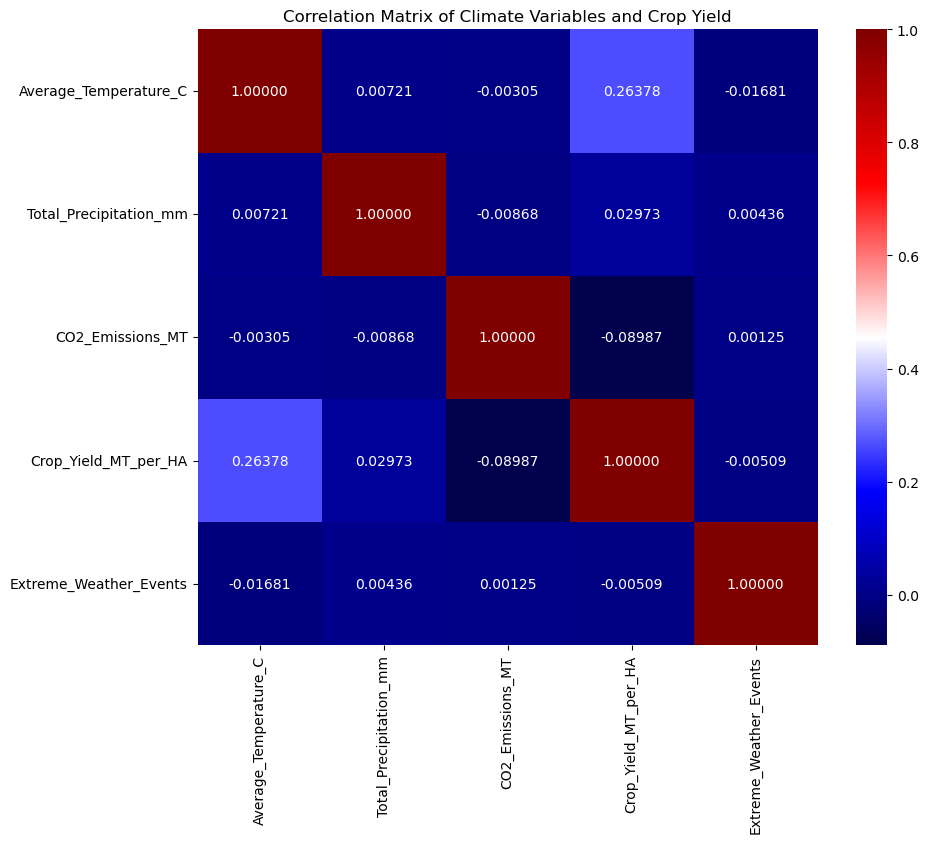

In [29]:
plt.figure(figsize=(10, 8))
correlation_matrix = Climate_Data[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 
                           'Extreme_Weather_Events',]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.5f')
plt.title('Correlation Matrix of Climate Variables and Crop Yield')
plt.show()

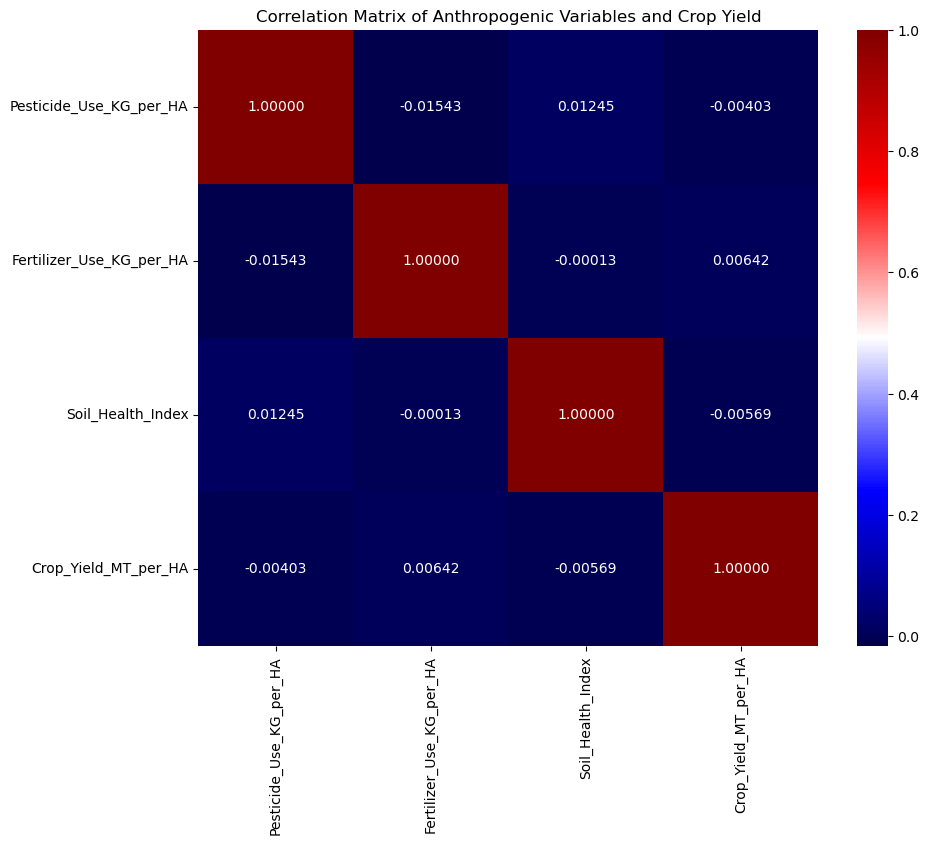

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = Climate_Data[['Pesticide_Use_KG_per_HA','Fertilizer_Use_KG_per_HA', 
                                   'Soil_Health_Index', 'Crop_Yield_MT_per_HA',]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.5f')
plt.title('Correlation Matrix of Anthropogenic Variables and Crop Yield')
plt.show()

Analyzing Nigeria Climate Impact on Crop Yield and Economic Impact

In [33]:
Nigeria_Climate_Data = Climate_Data[Climate_Data['Country']=="Nigeria"]
Nigeria_Climate_Data

Year  Country         Region  Crop_Type  Average_Temperature_C  \
9    2018-01-01  Nigeria     North West     Barley                  21.23   
10   2006-01-01  Nigeria     South East  Sugarcane                  -3.57   
14   1999-01-01  Nigeria     North West   Soybeans                  12.16   
17   2017-01-01  Nigeria     North West     Coffee                  21.95   
69   2000-01-01  Nigeria     North West       Rice                   6.26   
...         ...      ...            ...        ...                    ...   
9877 2002-01-01  Nigeria     South West     Fruits                  -2.00   
9881 2022-01-01  Nigeria     South West     Barley                  28.63   
9888 2006-01-01  Nigeria  North Central       Corn                   7.84   
9896 2016-01-01  Nigeria  North Central   Soybeans                  12.85   
9969 2019-01-01  Nigeria  North Central      Wheat                  25.59   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
9                     475.32             25.74                 0.765   
10                   1402.97              5.49                 2.670   
14                    328.52             20.15                 3.681   
17                   2480.33             11.71                 1.370   
69                   1404.10             10.44                 2.430   
...                      ...               ...                   ...   
9877                  858.34             16.15                 1.746   
9881                 1178.85              5.81                 3.150   
9888                 1706.26             19.84                 1.251   
9896                  356.53             16.87                 2.790   
9969                  806.70             22.87                 2.745   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
9                          1                25.74                    44.38   
10                        10                19.17                     4.38   
14                         9                47.13                    32.95   
17                        10                84.04                    19.86   
69                         0                85.26                    24.41   
...                      ...                  ...                      ...   
9877                       1                63.85                    35.30   
9881                       7                89.56                    27.84   
9888                       6                69.31                    26.07   
9896                       6                86.03                    33.06   
9969                       6                80.83                    27.42   

      Fertilizer_Use_KG_per_HA  Soil_Health_Index    Adaptation_Strategies  \
9                        72.92              84.21            No Adaptation   
10                       12.02              44.12         Water Management   
14                        8.69              36.32  Drought-resistant Crops   
17                       21.74              78.53            Crop Rotation   
69                        5.04              39.84            No Adaptation   
...                        ...                ...                      ...   
9877                      4.10              58.14         Water Management   
9881                     73.53              99.86            Crop Rotation   
9888                     17.80              86.77            Crop Rotation   
9896                     52.28              66.54            No Adaptation   
9969                     95.41              55.70          Organic Farming   

      Economic_Impact_Million_USD  
9                          167.21  
10                        1100.44  
14                         894.31  
17                         571.98  
69                         966.48  
...                           ...  
9877                       265.29  
9881                      1312.51  
9888                   

In [35]:
Nigeria_Climate_Data.groupby('Region')[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
                                        'Economic_Impact_Million_USD', ]].mean()

Average_Temperature_C  Total_Precipitation_mm  \
Region                                                         
North Central              13.527745             1648.797106   
North West                 15.733788             1541.955152   
South East                 14.883000             1587.042885   
South West                 14.781852             1610.220333   

               CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
Region                                                  
North Central         15.808723              2.293621   
North West            15.308977              2.294102   
South East            14.124654              2.227942   
South West            14.442741              2.302296   

               Economic_Impact_Million_USD  
Region                                      
North Central                   734.088936  
North West                      670.346477  
South East                      680.673692  
South West                      715.195444

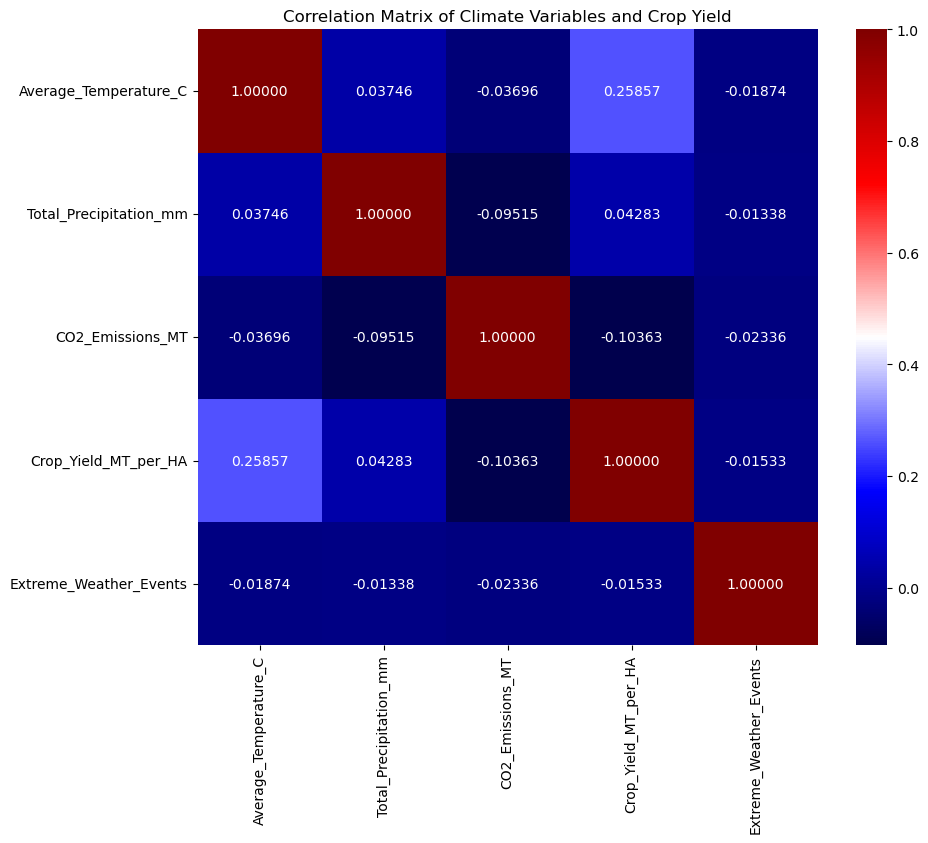

In [37]:
plt.figure(figsize=(10, 8))
correlation_matrix = Nigeria_Climate_Data[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 
                           'Extreme_Weather_Events',]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.5f')
plt.title('Correlation Matrix of Climate Variables and Crop Yield')
plt.show()

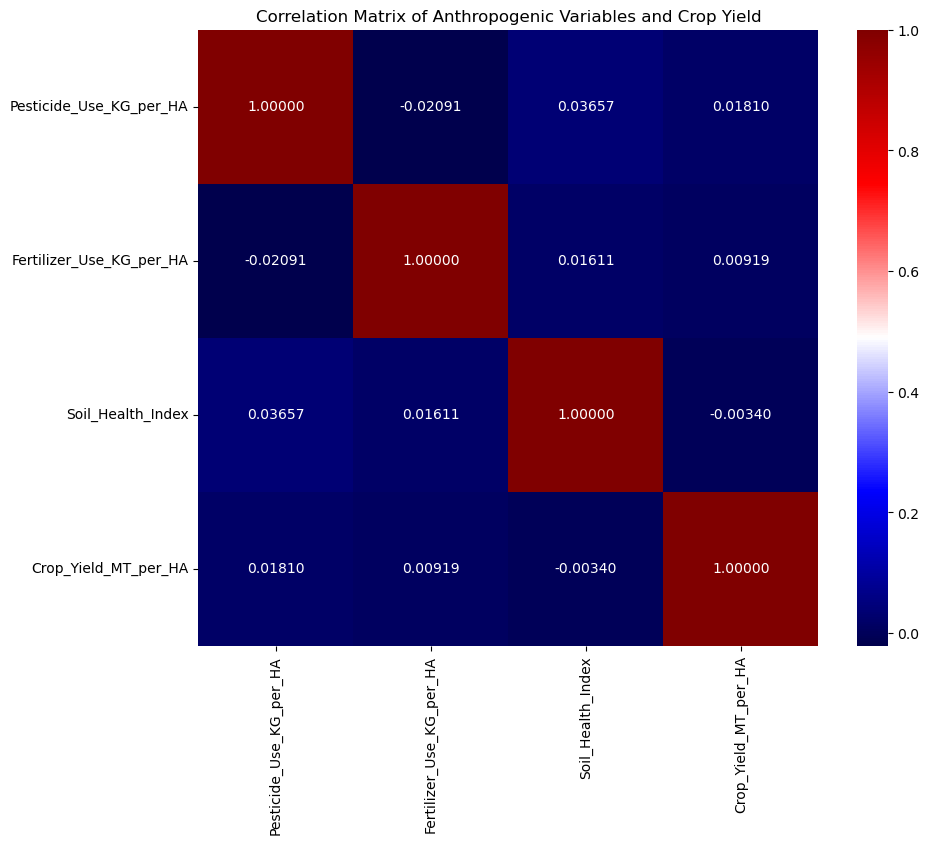

In [39]:
plt.figure(figsize=(10, 8))
correlation_matrix = Nigeria_Climate_Data[['Pesticide_Use_KG_per_HA','Fertilizer_Use_KG_per_HA', 
                                   'Soil_Health_Index', 'Crop_Yield_MT_per_HA',]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.5f')
plt.title('Correlation Matrix of Anthropogenic Variables and Crop Yield')
plt.show()

In [41]:
Nigeria_Climate_Data.groupby("Crop_Type")[['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 
                                           'Economic_Impact_Million_USD']].mean()

Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
Crop_Type                                                       
Barley                    24.368835                 48.768058   
Coffee                    24.180581                 52.822093   
Corn                      26.096577                 52.960541   
Cotton                    24.560748                 46.874953   
Fruits                    24.616786                 46.604881   
Rice                      26.414018                 49.023750   
Soybeans                  25.581215                 46.994953   
Sugarcane                 25.451803                 47.354918   
Vegetables                24.539362                 47.934362   
Wheat                     25.384951                 47.950971   

            Economic_Impact_Million_USD  
Crop_Type                                
Barley                       668.514854  
Coffee                       693.409651  
Corn                         771.985045  
Cotton                       694.550093  
Fruits                       709.955714  
Rice                         687.376696  
Soybeans                     741.921308  
Sugarcane                    723.735984  
Vegetables                   628.655319  
Wheat                        656.945631

# Linear Regression on Nigeria Climate Impact

In [78]:
X = Nigeria_Climate_Data["Fertilizer_Use_KG_per_HA"].values
y = Nigeria_Climate_Data["Crop_Yield_MT_per_HA"].values

# reshaping X with numpy
X = np.reshape(np.asarray(X), (len(X),1))

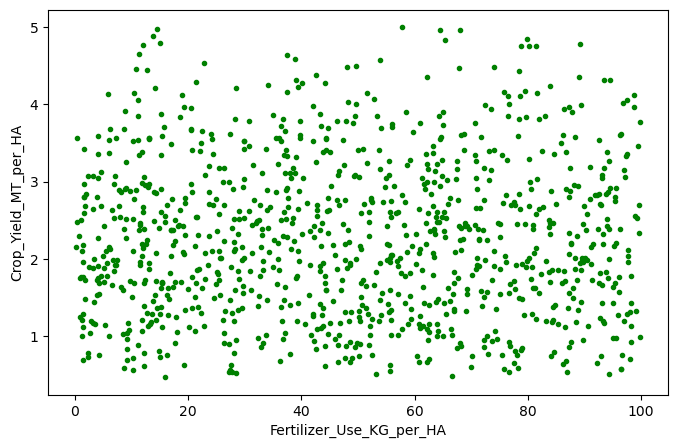

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, y, color="green", marker=".")
ax.set_xlabel("Fertilizer_Use_KG_per_HA")
ax.set_ylabel("Crop_Yield_MT_per_HA")
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
# creating the model and training it
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [86]:
# here we observe pretty high value of R2 as for having only two variables
r2 = reg.score(X_test, y_test)
print(f"R2: {r2:.5f}")

R2: -0.01696


#### The result R: -0.01696 indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predict = reg.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 0.96
MAE: 0.82


In [106]:
intercept = reg.intercept_
Coef = reg.coef_[0]

print (f"Fertilizer_Use_KG_per_HA = {intercept:.5f} + {Coef:.5f} · Crop_Yield_MT_per_HA")

Fertilizer_Use_KG_per_HA = 2.21130 + 0.00158 · Crop_Yield_MT_per_HA


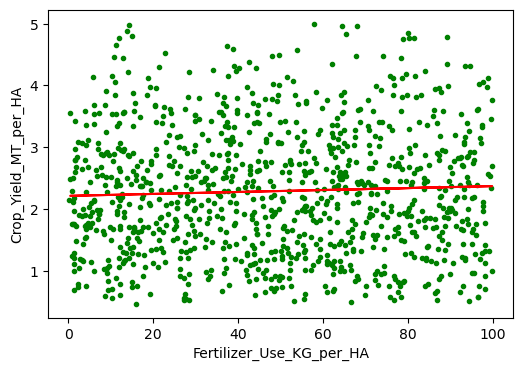

In [108]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, y, color="green", marker=".")
ax.plot(X_test, y_predict, color="red")
ax.set_xlabel("Fertilizer_Use_KG_per_HA")
ax.set_ylabel("Crop_Yield_MT_per_HA")
plt.show()

# Random Forest Classification

In [217]:
X = Nigeria_Climate_Data["Fertilizer_Use_KG_per_HA"].values
y = Nigeria_Climate_Data["Crop_Yield_MT_per_HA"].values

# reshaping X with numpy
X = np.reshape(np.asarray(X), (len(X),1))

In [219]:
model = RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
# Train the model
#model = RandomForestRegressor(n_estimators=1000, random_state=42)
#model.fit(X, Y)

# Predict values
y_pred = model.predict(X)
print("R²:", r2_score(y, y_pred))

R²: 0.7694673181962507


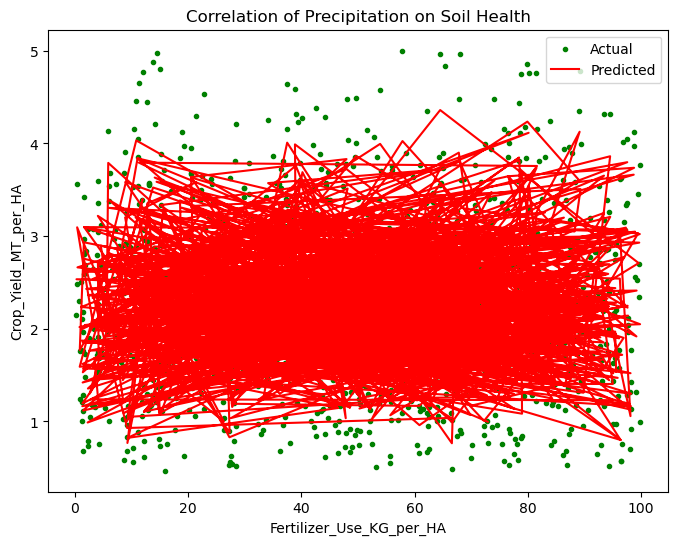

In [221]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y, color="green", marker=".", label="Actual")

# Plot predicted curve
y_pred = model.predict(X)
ax.plot(X, y_pred, color="red", label="Predicted")
ax.set_title('Correlation of Precipitation on Soil Health')
ax.set_xlabel("Fertilizer_Use_KG_per_HA")
ax.set_ylabel("Crop_Yield_MT_per_HA")
ax.legend()
plt.show()

Reshapping the values of X Variable and Sorting the values of both Variables

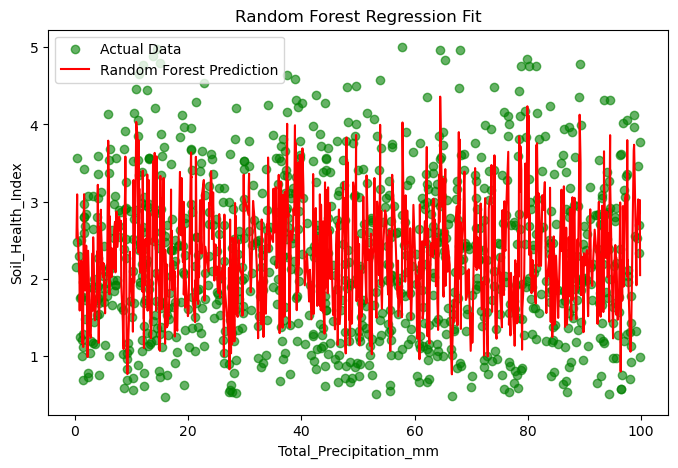

R² Score: 0.7694673181962507


In [223]:
# X reshaped correctly
X = X.reshape(-1, 1)
# the Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X, y, color="green", label="Actual Data", alpha=0.6)

# Sort values to make the prediction line smooth
sorted_indices = np.argsort(X.ravel())
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Line plot for Random Forest predictions
ax.plot(X_sorted, y_pred_sorted, color="red", label="Random Forest Prediction")
ax.set_xlabel("Total_Precipitation_mm")
ax.set_ylabel("Soil_Health_Index")
ax.set_title("Random Forest Regression Fit")
ax.legend()
plt.show()

print("R² Score:", r2_score(y, y_pred))

Because of the non-linear relationships

In [130]:
C = Nigeria_Climate_Data["Soil_Health_Index"].values
d = Nigeria_Climate_Data["Crop_Yield_MT_per_HA"].values

# reshaping X with numpy
C = np.reshape(np.asarray(C), (len(C),1))

In [132]:
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2)

In [134]:
model = RandomForestRegressor()
model.fit(C, d)
d_pred = model.predict(C)
# Train the model
#model = RandomForestRegressor(n_estimators=1000, random_state=42)
#model.fit(X, Y)

# Predict values
d_pred = model.predict(C)
print("R²:", r2_score(d, d_pred))

R²: 0.7762072405652161


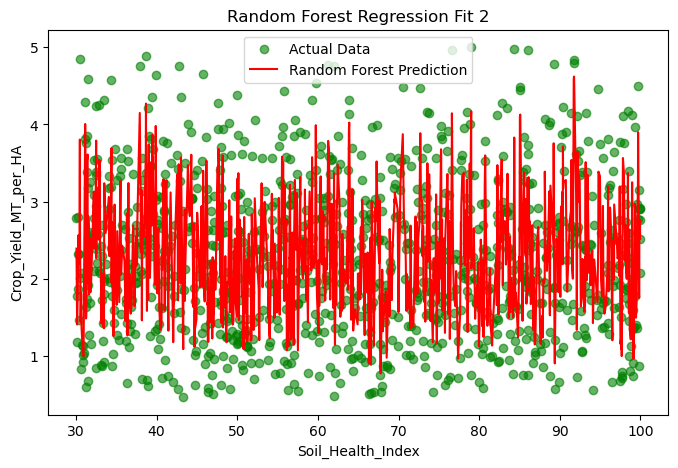

R² Score: 0.7762072405652161


In [136]:
# Make sure your C is reshaped correctly
C = C.reshape(-1, 1)
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(C, d, color="green", label="Actual Data", alpha=0.6)

# Sort values to make the prediction line smooth
sorted_indices = np.argsort(C.ravel())
C_sorted = C[sorted_indices]
d_pred_sorted = d_pred[sorted_indices]

# Line plot for Random Forest predictions
ax.plot(C_sorted, d_pred_sorted, color="red", label="Random Forest Prediction")
ax.set_xlabel("Soil_Health_Index")
ax.set_ylabel("Crop_Yield_MT_per_HA")
ax.set_title("Random Forest Regression Fit 2")
ax.legend()
plt.show()

print("R² Score:", r2_score(d, d_pred))

In [192]:
X = Nigeria_Climate_Data[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT']].values  # Multiple inputs
y = Nigeria_Climate_Data['Crop_Yield_MT_per_HA'].values  # Single output (target)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [198]:
y_pred = model.predict(X_test)

In [148]:
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: -0.6540814694909678
MAE: 1.0730436775889964
MSE: 1.8050191032163523


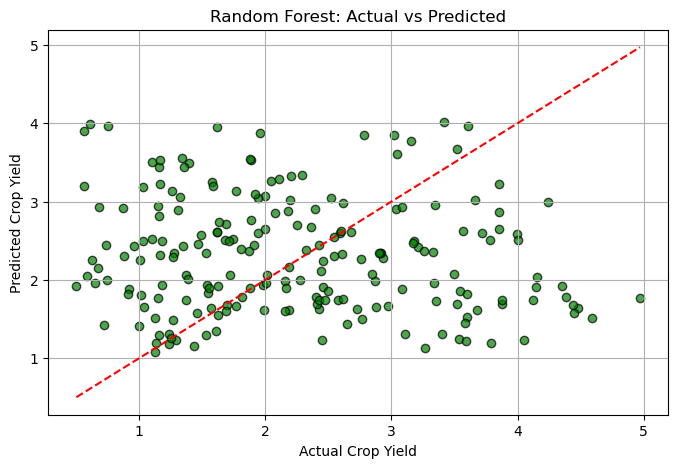

In [158]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

In [186]:
predicted_Yield = model.predict([[15.5]]).reshape(-1,1)

## Let's view how different types of crop type manifest themselves throughout the data.

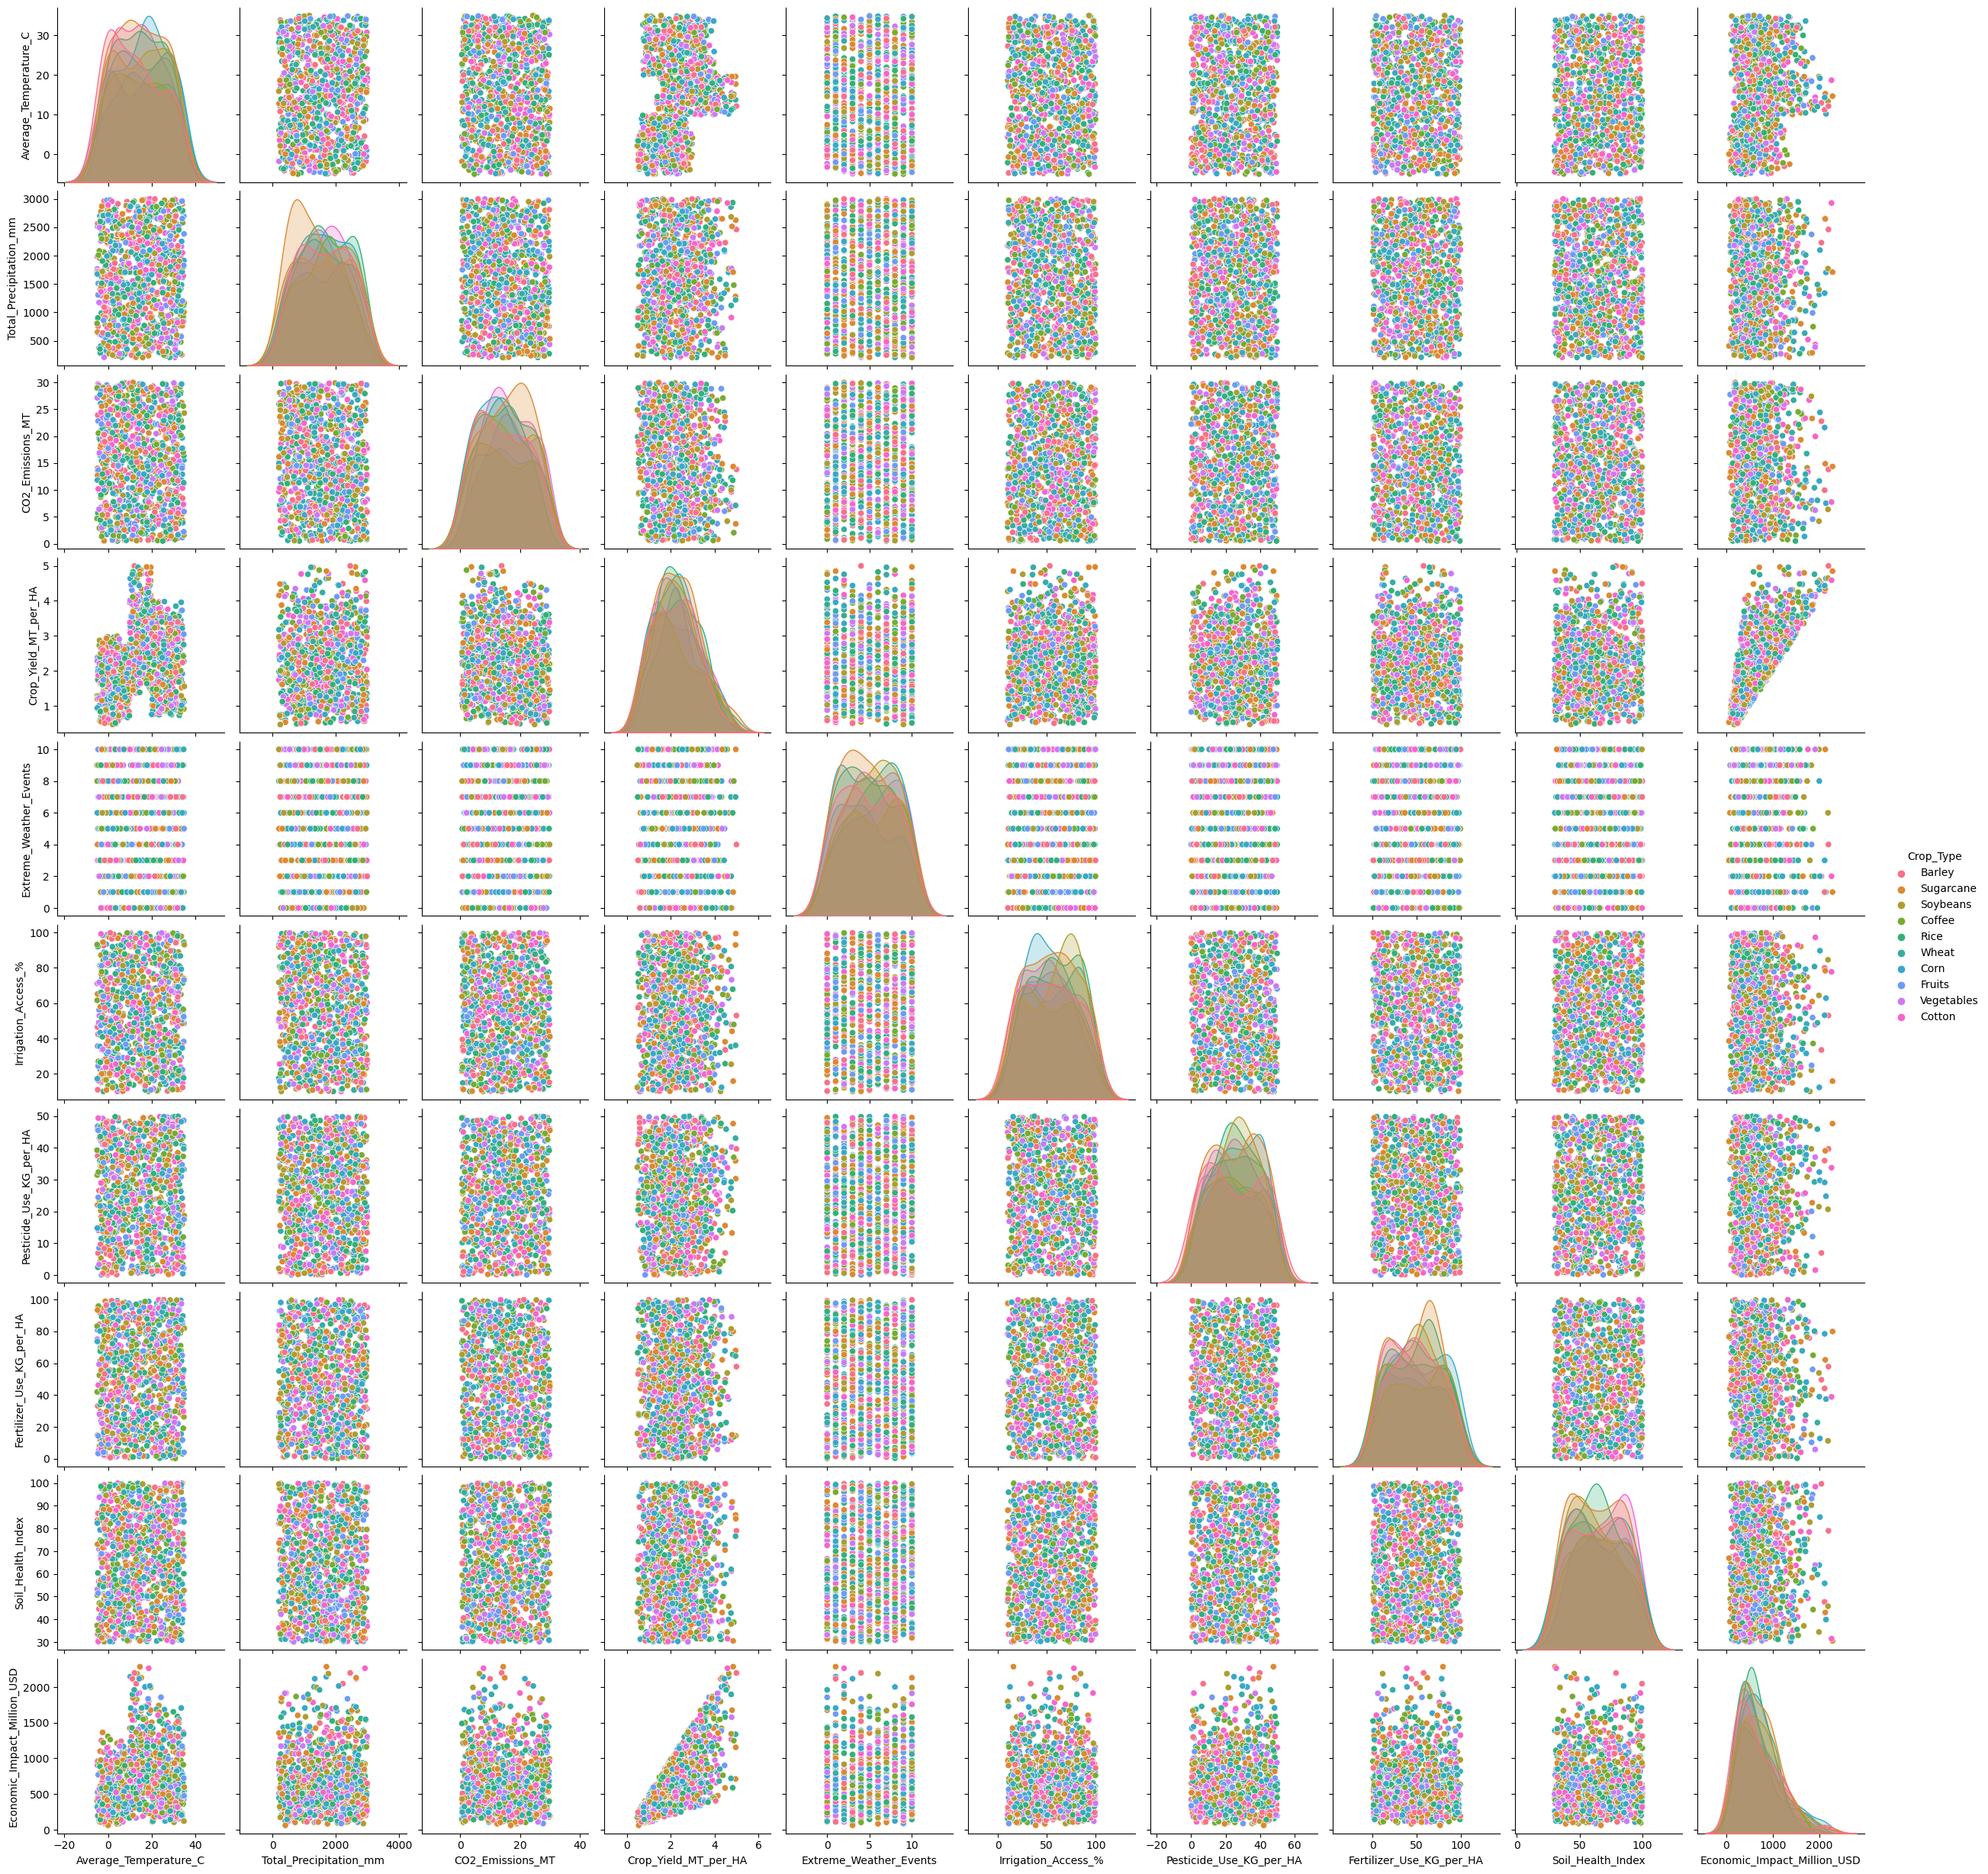

In [174]:
sns.pairplot(Nigeria_Climate_Data, hue="Crop_Type", palette="husl")
plt.show()

# Logistic Regression

In [281]:
X = Nigeria_Climate_Data[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT']].values
y = Nigeria_Climate_Data['Crop_Type'].values

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [285]:
logr = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")
logr.fit(X_train, y_train)

print(y)

['Barley' 'Sugarcane' 'Soybeans' ... 'Corn' 'Soybeans' 'Wheat']


In [287]:
y_pred = logr.predict(X_test)
y_pred_proba = logr.predict_proba(X_test)

#### Encoding the variables to numerical values

In [289]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
print(y)
#To reverse the encoder
# le.inverse_transform(y_encoded)

[0 7 6 ... 2 6 9]


In [291]:
# to view the classes order to diaplay decision function
class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(class_mapping)

{'Barley': 0, 'Coffee': 1, 'Corn': 2, 'Cotton': 3, 'Fruits': 4, 'Rice': 5, 'Soybeans': 6, 'Sugarcane': 7, 'Vegetables': 8, 'Wheat': 9}


In [295]:
X_Crop_Type = X_test[42]

fun_d = logr.decision_function([X_Crop_Type])

print("Decision function:" + \
     f"\nBarley: {fun_d[0,0]:.5f}\nCoffee: {fun_d[0,1]:.5f}\nCotton: {fun_d[0,2]:.5f}" + \
     f"\nFruits: {fun_d[0,3]:.5f}\nRice: {fun_d[0,4]:.5f}\nSoybeans: {fun_d[0,5]:.5f}" + \
     f"\nSugarcane: {fun_d[0,6]:.5f}\nVegetables: {fun_d[0,7]:.5f}\nWheat: {fun_d[0,8]:.5f}")

Decision function:
Barley: -1.90871
Coffee: -2.42469
Cotton: -2.45022
Fruits: -2.09186
Rice: -2.58072
Soybeans: -2.14894
Sugarcane: -2.06386
Vegetables: -1.94062
Wheat: -1.87842


The Model's confidence is low, although all scores are negative and very close together. This suggests that the model is not very confident in any of the classes.

We need an additional matric to assess prediction quality: Confusion Matrix

In [251]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
log_loss_value = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"Roc-Auc: {roc_auc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")


Accuracy: 0.12
Precision: 0.05
Recall: 0.10
F1: 0.07
Roc-Auc: 0.52
Log Loss: 2.30


### This Performance Is Poor:
#### Accuracy: 0.12

#### You're predicting correctly only 12% of the time.

#### If you have 8 or more classes, this might be random guessing.

#### Precision: 0.05

#### Only 5% of your positive predictions are actually correct — suggests a lot of false positives.

#### Recall: 0.10

#### You're only identifying 10% of actual positive cases — so you're missing most of them.

#### F1 Score: 0.07

#### This combines precision and recall. A score of 0.07 is very low.

#### ROC-AUC: 0.52

#### Close to 0.5, which means the model is barely better than random guessing.

#### Log Loss: 2.30

#### High log loss = poor confidence in predictions and poor calibration.

Calculating the Probability score for the dependent Variable,

In [302]:
scores = logr.decision_function([X_Crop_Type])
print(scores)

[[-1.90870532 -2.42468614 -2.45022161 -2.09186017 -2.58072484 -2.14893984
  -2.06385559 -1.94061818 -1.87842329 -2.5988409 ]]


In [309]:
le.inverse_transform(y)
pd.Series(y).value_counts(normalize=True).sort_values(ascending=False)

7    0.118562
5    0.108844
2    0.107872
6    0.103984
3    0.103984
0    0.100097
9    0.100097
8    0.091351
1    0.083576
4    0.081633
Name: proportion, dtype: float64